<a href="https://colab.research.google.com/github/mayu202020/Classification-Analytics/blob/main/Classif_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("/content/titanic.csv.zip")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


EDA & Understanding Data

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0, 0.5, 'frequency')

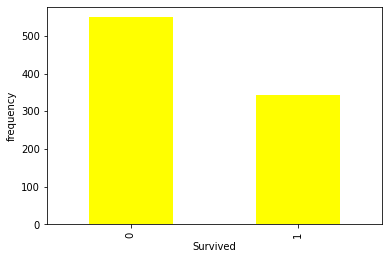

In [ ]:
surv = df["Survived"].value_counts().plot(kind="bar",color="yellow")
surv.set_xlabel("Survived")
surv.set_ylabel("frequency")

Text(0, 0.5, 'frequency')

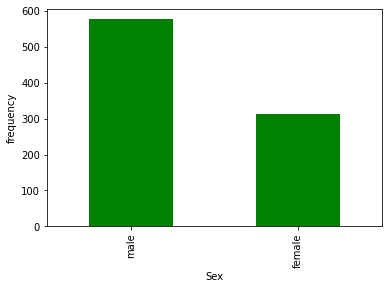

In [ ]:
gen = df["Sex"].value_counts().plot(kind="bar",color="green")
gen.set_xlabel("Sex")
gen.set_ylabel("frequency")

Text(0, 0.5, 'frequency')

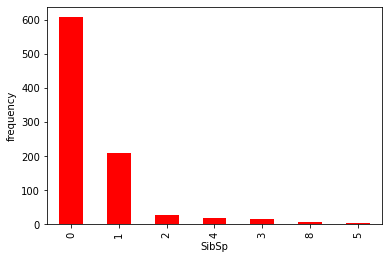

In [ ]:
sib = df["SibSp"].value_counts().plot(kind="bar",color="red")
sib.set_xlabel("SibSp")
sib.set_ylabel("frequency")

Text(0, 0.5, 'frequency')

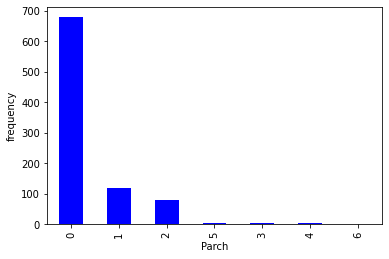

In [ ]:
parch = df["Parch"].value_counts().plot(kind="bar",color="blue")
parch.set_xlabel("Parch")
parch.set_ylabel("frequency")

Text(0, 0.5, 'frequency')

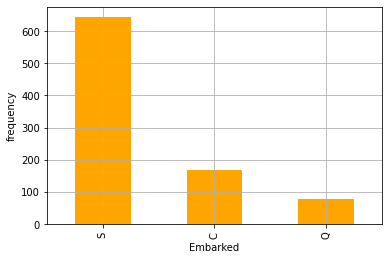

In [ ]:
emb = df["Embarked"].value_counts().plot(kind="bar",color="orange",grid="true")
emb.set_xlabel("Embarked")
emb.set_ylabel("frequency")

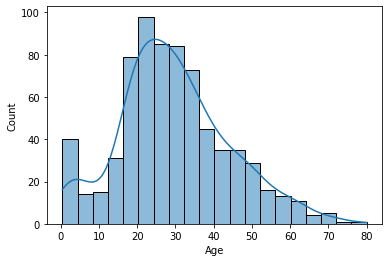

In [ ]:
sns.histplot(df["Age"],kde="True")

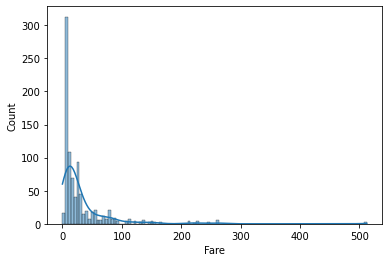

In [ ]:
sns.histplot(df["Fare"],kde="True")

Data Cleaning

In [ ]:
df["Age"] = df["Age"].fillna("29.0")

In [ ]:
df["Embarked"] = df["Embarked"].fillna("mode")

In [ ]:
df = df.drop(["PassengerId","Name","Ticket","Fare","Cabin"],axis=1)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,29.0,1,2,S
889,1,1,male,26.0,0,0,C


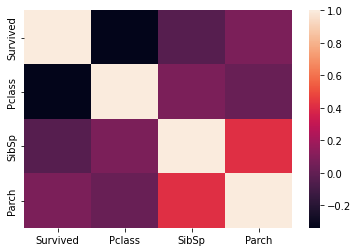

In [ ]:
sns.heatmap(df.corr())

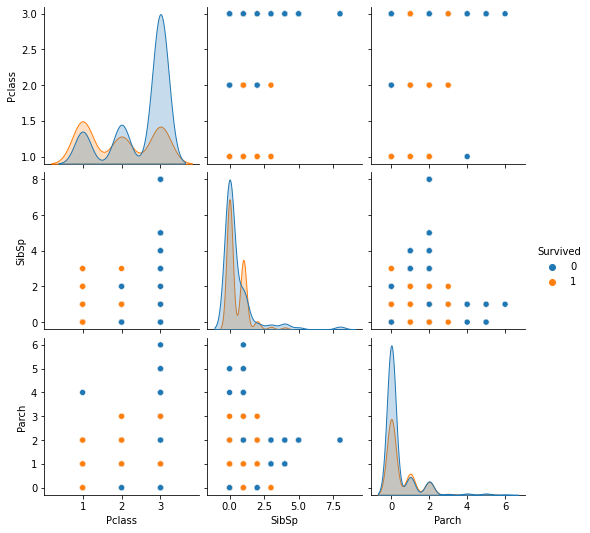

In [ ]:
sns.pairplot(df,hue="Survived")

Spliting & Transforming Data

In [ ]:
x = df.drop(["Survived"],axis=1)
y = df["Survived"]

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
clf = make_column_transformer((OneHotEncoder(drop="first",sparse=False),["Sex","Embarked"]),remainder="passthrough")

Building Logistic Regression Model

In [ ]:
logreg = LogisticRegression()

In [ ]:
pipe = make_pipeline(clf,logreg)

In [ ]:
pipe.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Sex', 'Embarked'])])),
                ('logisticregression', LogisticRegression())])

In [ ]:
y_pred = pipe.predict(x_test)

In [ ]:
print(r2_score(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

0.039265536723163796
0.7877094972067039


Building Decision Tree Model

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
pipe1 = make_pipeline(clf,dt)

In [ ]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Sex', 'Embarked'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
y_pred1 = pipe1.predict(x_test)

In [ ]:
print(r2_score(y_pred1,y_test))
print(accuracy_score(y_pred1,y_test))

-0.06288798920377858
0.7541899441340782
